In [20]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
SEEDS = [0,1,2]
CASES = ["plaintext", "amr_residual", "dep_residual"]
FEWSHOTS = [1, 10, 50, 100]

df_format_string = "results/transfer_results_{split}_{src_dataset}_{tgt_dataset}_{fewshot}_{seed}_{case}.csv"

def get_dataset_performance(src_dataset, tgt_dataset, split="test", return_precision_recall=True):
    results_dicts = []
    
    for fewshot in FEWSHOTS:
        for case in CASES:
            for seed in SEEDS:
                results_dict = {"case": case, "seed": seed, "fewshot": fewshot}
                df_filename = df_format_string.format(src_dataset=src_dataset, tgt_dataset=tgt_dataset, fewshot=fewshot, split=split, seed=seed, case=case)
                try:
                    results_df = pd.read_csv(df_filename)
                except FileNotFoundError:
                    print(f"Error with {df_filename}")
                    continue
                labels = sorted(results_df["labels"].unique())
                p, r, f, _ = precision_recall_fscore_support(results_df["labels"], results_df["predictions"])
                for label, label_p, label_r, label_f in zip(labels, p, r, f):
                    if return_precision_recall:
                        results_dict[f"{label}_precision"] = label_p
                        results_dict[f"{label}_recall"] = label_r
                    results_dict[f"{label}_f1"] = label_f

                results_dicts.append(results_dict)

    results_df = pd.DataFrame(results_dicts)
    return results_df

mscorpus_risec_df = get_dataset_performance("mscorpus", "risec", return_precision_recall=False)

Error with results/transfer_results_test_mscorpus_risec_1_0_plaintext.csv


In [14]:
mscorpus_risec_df[mscorpus_risec_df["fewshot"] == 1].groupby("case").mean().drop(columns=["seed", "fewshot"]).T

case,amr_residual,dep_residual,plaintext
ArgM_INT_f1,0.082783,0.051169,0.117782
ArgM_LOC_f1,0.310834,0.258831,0.277839
ArgM_MNR_f1,0.528357,0.568646,0.506884
ArgM_PRP_f1,0.220494,0.124796,0.160586
ArgM_SIM_f1,0.134731,0.130469,0.066354
ArgM_TMP_f1,0.390300,0.358462,0.436341
Arg_DIR_f1,0.118344,0.107417,0.146129
Arg_GOL_f1,0.086995,0.113948,0.132751
Arg_PAG_f1,0.072738,0.036546,0.032258
Arg_PPT_f1,0.358660,0.312548,0.311900


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


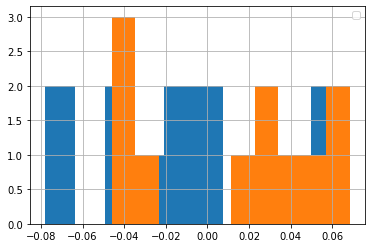

In [21]:
transpose_risec_f1s =  mscorpus_risec_df[mscorpus_risec_df["fewshot"] == 1].groupby("case").mean().drop(columns=["seed", "fewshot"]).T

fig, ax = plt.subplots()
ax.legend()
(transpose_risec_f1s["dep_residual"] - transpose_risec_f1s["plaintext"]).hist(ax=ax)

(transpose_risec_f1s["amr_residual"] - transpose_risec_f1s["plaintext"]).hist(ax=ax)